#Credit Risk Modeling | Part 1: Preprocessing Data

<img src='https://youtrading.com/fr/wp-content/uploads/2022/10/GettyImages-1324277066.jpg'>

Credit risk modeling is important for financial institutions. It represents the risk of a borrower not being able to pay back the loan amount, credit card or other types of loans. In some cases, borrowers can pay partial of the debt amount; therefore, the principal amount and interest amount are not paid. Both statistics and machine learning techniques play an important role in credit risk modeling. Some core skills include handling big data and advanced statistical modeling. 

**Terms ⚠️**

There are two types of Internal Rating Based (IRB) approaches which are Foundation IRB and Advanced IRB.  
**Foundation IRB**  
PD is estimated internally by the bank while LGD and EAD are prescribed by regulator.  
**Advanced IRB**  
PD, LGD, and EAD can be estimated internally by the bank itself.

*  PD: probability of default in logistic regression  
Probability of default means the likelihood that a borrower will default on debt (credit card, mortgage or non-mortgage loan) over a one-year period. In simple words, it returns the expected probability of customers fail to repay the loan. Probability is expressed in the form of percentage, lies between 0% and 100%. Higher the probability, higher the chance of default.  
*  LGD: Loss given default in beta regression model   
It means how much of the amount outstanding we expect to lose. It is a proportion of the total exposure when borrower defaults. It is calculated by (1 - Recovery Rate).  
*  EAD: exposure at default in beta regression model  
It means how much should we expect the amount outstanding to be in the case of default. It is the amount that the borrower has to pay the bank at the time of default.  

We use PD model to create score cards to accept or reject one's demand of credit risk.

There are three models to use for bank management
*  Exposure Lose, EL = PD x LGD x EAD

There are two types of credit risk modeling: 
1.  Application model.   
	Whether to grant a loan or not. What interest rate  
	Risk based pricing, higher the risk higher the interest  
2.  Behaviour model  
	Whether to lend more money to existing borrower. Application.   
	Statistical models for estimating credit risk. Represented in a simplified way. Score card. Probability of default model. PD model in a simpler way.   

**Dataset ▶**

The dataset contains more than 800,000 consumer loans issued from 2007 to 2015 by Lending Club. It is a large US peer-to-peer lending company. There are different versions of this dataset online and we take a version available on kaggle.com on (link)[https://www.kaggle.com/wendykan/lending-club-loan-data/version/1} . It should be noted that are discrete and continous columns that should be preprocessed accordingly.

We assume a scenario where data from 2007 to 2014 are available at the moment of building initial Expected Loss models, and other part of data of 2015 will become available from the applications later on. Therefore, the data is divided into two periods: (i) data from 2007 to 2014 and (ii) data in 2015.

Later, we investigate whether the former Probability of Default (PD) model built with the 2015 data have similar characteristics with the applications we used to build the initial PD model.

**Target 🎯** 

One of the prominent bank is asked us to build a credit risk model by using Loan Data to provide them a scorecard to use in their daily procedures as well a pipeline to calculate exposure loss. 

Here is a step-by-step instruction obtained as also in compliance with the Basel II requirements: 

**In Notebook L01** (this notebook)   
1-  Preprocessing - Converting columns into dummy variables by fine and coarse classing 
  
**In Notebook L02**  
2-  Calculate the PD model with logistic regression  
2-  Based on PD model, provide a practical scorecard in csv format  
    
**In Notebook L03**   
3-  Construct LGD model with beta regression  
4-  Build EAD model with beta regression  
5-  Calculate the exposure loss after obtaining all models  
  
  
**In Notebook L04**  
6-  Check the models if they are still doing good with the recent credit risk modeling.   

# 1 Data Preparation

## Importing Libraries

In [1]:
#installing gdown package to download dataset stored in G Drive
!pip install gdown
# to upgrade
!pip install --upgrade gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#data handling libs
import numpy as np
import pandas as pd

#lib to download the g-drive data
import gdown

#sklearn libs
from sklearn.model_selection import train_test_split

#data viz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#importing custom-made functions
import sys #importing local functions in src folder
sys.path.append('../src/')
from functions import *

## Importing Data

In [3]:
#loading dataset from Gdrive
fname_2007etp = "https://drive.google.com/file/d/16JXrTBSgEJH4_30zlFFBye1GRHh5h4O0/view?usp=share_link"
fname_2007etp = 'https://drive.google.com/uc?id=' + fname_2007etp.split('/')[-2]

#updated dataset
#fname_2015 = "https://drive.google.com/file/d/1Fb7LFd97aJm0ySb0A48_znfe9KQzaUZO/view?usp=share_link"
#fname_2015 = 'https://drive.google.com/uc?id=' + fname_2015.split('/')[-2]

In [ ]:
# downloading gdrive files
url = fname_2007etp
output = "loan_data_2007_2014.csv"
gdown.download(url, output, quiet=False)

In [5]:
loan_data= pd.read_csv(output)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Exploring Data

In [6]:
# Uncomment below to set the pandas dataframe options to display all columns/ rows.
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

loan_data.shape

(466285, 75)

In [7]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
loan_data.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,...,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


In [9]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [10]:
# Displaying column names with non missing cases and datatype
loan_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

There are 74 columns in our dataset. There are several empty cells. It is neccessary to concentrate on some of the columns and handle the empty cells in the coming sections.

After some trial and errors, we come up with the following columns that are found significant to be kept for the predictive models. Therefore, preprocessing will be applied solely on the following columns: 

Attn: The preprocessing part is lengthy and takes some time to overview. However, it is repetitive and not complex.

---
**Discrete Variables**

1. 'grade': assigned loan grade  
2. 'sub_grade': LC assigned loan subgrade taxliens
3. 'home_ownership': the home ownership status provided by the borrower during registration. Values are: RENT, OWN, MORTGAGE, OTHER.
4. addr_state: The state provided by the borrower in the loan application
5. 'verification_status': Indicates if the borrowers' joint income was verified by LC, not verified, or if the income source was verified
6. 'purpose': A category provided by the borrower for the loan request.
7. 'initial_list_status': The initial listing status of the loan. Possible values are – W, F

---
**Continuous Variables**
1. 'term': number of payments on the loan. Values are in months and can be either 36 or 60.
2. 'emp_length': Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
3. 'int_rate': Interest rate on the loan
4. 'mths_since_earliest_cr_line': date the borrower's earliest reported credit line was opened
5. 'delinq_2yrs': The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
6. 'inq_last_6mths': The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
7. 'open_acc': The number of open credit lines in the borrower's credit file
8. 'pub_rec' : Number of derogatory public records
9. 'total_acc': The total number of credit lines currently in the borrower's credit file
10. 'acc_now_delinq': The number of accounts on which the borrower is now delinquent.
11. 'total_rev_hi_lim': Total revolving high credit/credit limit
12. 'annual_inc': The self-reported annual income provided by the borrower during registration.
13. 'dti': A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
14. 'mths_since_last_delinq': The number of months since the borrower's last delinquency.
15. 'mths_since_last_record': The number of months since the last public record.



Please note that the following column is not considered in the example herein but would have improved the prediction scores.
* 'mths_since_issue_d': Months since most recent issue d 


# 2 General Preprocessing

## a Discrete variables - Dummy columns

In [11]:
#creating dummy variables. adding new columns of values 1 or 0. 
# ex for Gender=Male, we use 0 Non 1 True. etc
# single dummy variable is sufficient for two categories
# if there are 4 categories, we need only 3 categories in our prediction model
# we use the function 
pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':').head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [12]:
dummy_columns = ['grade','sub_grade','home_ownership','verification_status',
                 'loan_status','purpose','addr_state','initial_list_status']

df_Dummies = pd.DataFrame()
for col in dummy_columns:
  df_Dummy= pd.get_dummies(loan_data[col], prefix = col, prefix_sep = ':')
  df_Dummies = pd.concat([df_Dummies,df_Dummy ], axis=1)
  #print(loan_data_Dummies.head())
  # = pd.concat([loan_data,loan_data_Dummies],axis = 1)

In [13]:
#list of all dummy columns. 
df_Dummies.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'sub_grade:A1', 'sub_grade:A2', 'sub_grade:A3',
       'sub_grade:A4', 'sub_grade:A5', 'sub_grade:B1', 'sub_grade:B2',
       'sub_grade:B3', 'sub_grade:B4', 'sub_grade:B5', 'sub_grade:C1',
       'sub_grade:C2', 'sub_grade:C3', 'sub_grade:C4', 'sub_grade:C5',
       'sub_grade:D1', 'sub_grade:D2', 'sub_grade:D3', 'sub_grade:D4',
       'sub_grade:D5', 'sub_grade:E1', 'sub_grade:E2', 'sub_grade:E3',
       'sub_grade:E4', 'sub_grade:E5', 'sub_grade:F1', 'sub_grade:F2',
       'sub_grade:F3', 'sub_grade:F4', 'sub_grade:F5', 'sub_grade:G1',
       'sub_grade:G2', 'sub_grade:G3', 'sub_grade:G4', 'sub_grade:G5',
       'home_ownership:ANY', 'home_ownership:MORTGAGE',
       'home_ownership:NONE', 'home_ownership:OTHER',
       'home_ownership:OWN', 'home_ownership:RENT',
       'verification_status:Not Verified',
       'verification_status:Source Verified',
       'verification_status:Verified', 'lo

In [14]:
#merging dummy columns with the main dataset
loan_data = pd.concat([loan_data,df_Dummies],axis = 1)

## b Continuous variables - Dt format conversion

In [15]:
#lets convert emp_length into integer
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [16]:
loan_data['emp_length_int']= loan_data['emp_length'].str.replace('\+ years','')
loan_data['emp_length_int']= loan_data['emp_length_int'].str.replace('< 1 year',str(0))
loan_data['emp_length_int']= loan_data['emp_length_int'].str.replace('n/a',str(0))
loan_data['emp_length_int']= loan_data['emp_length_int'].str.replace(' years','')
loan_data['emp_length_int']= loan_data['emp_length_int'].str.replace(' year','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [17]:
loan_data['emp_length_int']=pd.to_numeric(loan_data['emp_length_int'])

In [18]:
# date variables not in dt format
loan_data['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [19]:
#converting date column to format %b-%y : Apr-03 => 2003-04-03
loan_data['earliest_cr_line_date']=pd.to_datetime(loan_data['earliest_cr_line'],format = '%b-%y')
#calculating the months since a default date taken as 2017-12-01
diff_cr_line = pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric( diff_cr_line / np.timedelta64(1, 'M')))

In [20]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [21]:
#finding out why there are negative values in our dataset
m1 = loan_data['mths_since_earliest_cr_line']<0
loan_data.loc[m1,['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']].head()

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0


In [22]:
# it is neccessary to handle negative values. they are due to the 196x data read as 206x
# we take the maximum month difference to replace negative values
loan_data.loc[m1,'mths_since_earliest_cr_line'] = loan_data.loc[:,'mths_since_earliest_cr_line'].max()

In [23]:
#let's convert term column to integer format
loan_data['term']

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
466280     60 months
466281     60 months
466282     60 months
466283     36 months
466284     36 months
Name: term, Length: 466285, dtype: object

In [24]:
loan_data['term_int'] = loan_data['term'].str.replace(' months', '').astype(int)
loan_data['term_int'].describe()

count    466285.000000
mean         42.605334
std          10.719040
min          36.000000
25%          36.000000
50%          36.000000
75%          60.000000
max          60.000000
Name: term_int, dtype: float64

In [25]:
# Assuming we are in December 2017
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')

#calculating the month difference from 2017-12-01
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
diff_issue_d = pd.to_datetime('2017-12-01') - loan_data['issue_d_date']
loan_data['mths_since_issue_d'] = round(pd.to_numeric( diff_issue_d / np.timedelta64(1, 'M')))

# Showing some descriptive statisics for the values of a column.
loan_data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

## c Checking for missing values or cleaning them

In [26]:
pd.options.display.max_rows = None
loan_data.isnull().sum().sort_values(ascending=False)

open_il_6m                                                         466285
all_util                                                           466285
inq_fi                                                             466285
total_cu_tl                                                        466285
open_rv_24m                                                        466285
inq_last_12m                                                       466285
open_rv_12m                                                        466285
il_util                                                            466285
total_bal_il                                                       466285
max_bal_bc                                                         466285
mths_since_rcnt_il                                                 466285
open_il_24m                                                        466285
open_il_12m                                                        466285
open_acc_6m                           

In [27]:
pd.options.display.max_rows = 100

In [28]:
# filling up the empty rows that will be used in our model.
# we use funded_amnt for the missing total_rev_hi_lim values
# fundedAmnt The total amount committed to that loan at that point in time.
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'],inplace = True)

In [29]:
# for the missing values in annual_inc, mean value is considered.  
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(),inplace = True)

In [30]:
# for the missing values below, we consider 0
loan_data['mths_since_earliest_cr_line'].fillna(0,inplace = True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

# 3 PD Model Definition

Remember: EL = PD * LGB * EDA

First, we need to define the default definition. Good and bad definitions are needed

## a Data Preparation - Dependent Variable

Dependent variable. Good/Bad - Defaulted borrower Definition. Default and Non-default Accounts

In [31]:
# let's explore loan_status column further and findout the proportion of data
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [32]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [33]:
# if the result == 'Charged Off', 'Default', 'Does not meet the credit policy. Status: Charged Off.',
#                   'Late (31-120 days)', We take 0 (Bad). Otherwise = 1 (Good)
bad_def = ['Charged Off', 'Default','Does not meet the credit policy. Status: Charged Off.',
           'Late (31-120 days)']

#good is 1, bad is 0
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(bad_def), 0, 1) 

In [34]:
loan_data['good_bad'].head()

0    1
1    0
2    1
3    1
4    1
Name: good_bad, dtype: int64

In [35]:
loan_data['good_bad'].value_counts() / loan_data['good_bad'].count() 

1    0.892326
0    0.107674
Name: good_bad, dtype: float64

##**b Train n Test Set Split**


In [36]:
#splitting data into test and split datasets. 80:20 train to test ratio
inputs_train, inputs_test, targets_train, targets_test = train_test_split(
    loan_data.drop('good_bad',axis = 1), loan_data['good_bad'], test_size=0.2, 
    random_state= 75)

In [37]:
inputs_train.shape

(373028, 207)

In [38]:
inputs_test.shape

(93257, 207)

##**c Selecting test or train set for preproc.**


In [39]:
#first run it for train set and then for test set for the preprocessing
df_inputs_prepr = inputs_train
df_targets_prepr = targets_train
#test set
#df_inputs_prepr = inputs_test
#df_targets_prepr = targets_test

#next we will calculate Weight of Evidence (WoE)

#4 Discrete Data Preparation - WoE

**Let's automate the calculation of WoE and IV**

**Weight of Evidence- Woe**
To what extent an independent variable would predict a dependent variable

Positive WOE means Distribution of Goods > Distribution of Bads  
Negative WOE means Distribution of Goods < Distribution of Bads  
Hint : Log of a number > 1 means positive value. If less than 1, it means negative value.  

Two ways to classify groups in WoE calculations  

1. Fine Classing: Create 10 to 20 bins/groups for a continuous independent variable and then calculate WOE and IV of the variable. 
2. Coarse Classing: Combine adjacent categories with similar WOE scores

---
**Information Value (IV)**

Information value is a useful technique to select important variables in a predictive model. It represents how much independent information it brings originally to explain dependent value. It helps to rank variables on the basis of their importance. The IV is calculated using the following formula :  

IV = ∑ (% of non-events - % of events) * WOE

IV categories  
* Less than 0.02 => 	Not useful for prediction   
* 0.02 to 0.1	=> Weak predictive Power  
* 0.1 to 0.3	=> Medium predictive Power  
* 0.3 to 0.5 => 	Strong predictive Power  
* '>0.5 =>	Suspicious Predictive Power  


## Part 1 Discrete Variables: Dummy Variables

In [40]:
df_temp = woe_discrete(df_inputs_prepr, 'grade',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2657,0.750847,0.007123,1995.0,662.0,0.005992,0.016524,-1.014478,NaN,NaN,0.278546
1,F,10436,0.764661,0.027976,7980.0,2456.0,0.023966,0.061305,-0.939208,0.013814,0.075271,0.278546
2,E,28690,0.809934,0.076911,23237.0,5453.0,0.069788,0.136114,-0.668032,0.045273,0.271176,0.278546
3,D,61459,0.848875,0.164757,52171.0,9288.0,0.156686,0.231841,-0.391809,0.038941,0.276224,0.278546
4,C,100162,0.886434,0.268511,88787.0,11375.0,0.266655,0.283935,-0.062790,0.037559,0.329019,0.278546
5,B,109728,0.922572,0.294155,101232.0,8496.0,0.304031,0.212071,0.360207,0.036138,0.422997,0.278546
6,A,59896,0.961066,0.160567,57564.0,2332.0,0.172883,0.058210,1.088559,0.038494,0.728352,0.278546


  **Drawing the plots**

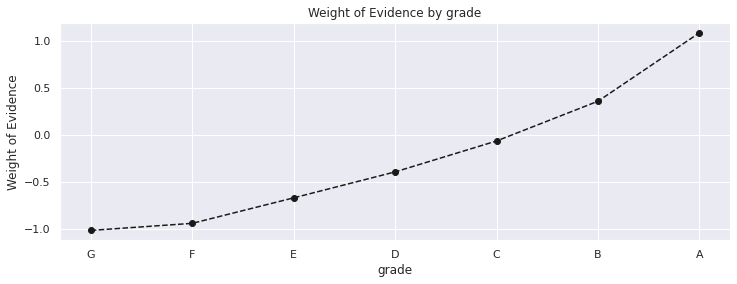

In [41]:
plot_by_woe(df_temp,0)

As we can see, WoE increases with increasing external credit grade. 
That means loans with greater external grade are better in general.

In [42]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership',df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NONE,44,0.840909,0.000118,37.0,7.0,0.000111,0.000175,-0.452604,NaN,NaN,inf
1,OTHER,130,0.853846,0.000348,111.0,19.0,0.000333,0.000474,-0.352521,0.012937,0.100083,inf
2,RENT,150880,0.876445,0.404474,132238.0,18642.0,0.397152,0.465329,-0.158426,0.022599,0.194095,inf
3,OWN,33428,0.893502,0.089613,29868.0,3560.0,0.089703,0.088862,0.009415,0.017058,0.167841,inf
4,MORTGAGE,188545,0.905413,0.505445,170711.0,17834.0,0.512698,0.445160,0.141253,0.011910,0.131838,inf
5,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.094587,inf,inf


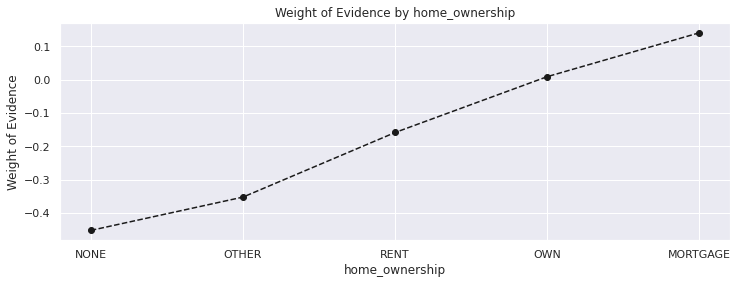

In [43]:
plot_by_woe(df_temp,0)

We don't want dummy variables for None, Other and Any.
They are undenrepresented categories. 

Let's combine None, Other and Any

In [44]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum ([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                              df_inputs_prepr['home_ownership:NONE'], df_inputs_prepr['home_ownership:ANY'],])

In [45]:
df_inputs_prepr['addr_state'].unique()

array(['CA', 'IN', 'CO', 'MI', 'WA', 'AZ', 'NJ', 'VA', 'OR', 'TX', 'IL',
       'SC', 'FL', 'NY', 'SD', 'PA', 'MA', 'AL', 'NC', 'TN', 'MD', 'OH',
       'NH', 'GA', 'CT', 'MN', 'MO', 'WI', 'LA', 'NM', 'HI', 'NV', 'UT',
       'DE', 'OK', 'KS', 'MT', 'KY', 'AR', 'MS', 'WV', 'DC', 'RI', 'WY',
       'NE', 'VT', 'AK', 'ID', 'ME', 'IA'], dtype=object)

In [46]:
df_temp = woe_discrete(df_inputs_prepr,'addr_state', df_targets_prepr)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,13,0.615385,0.000035,8.0,5.0,0.000024,0.000125,-1.647608,NaN,NaN,inf
1,NV,5174,0.868767,0.013870,4495.0,679.0,0.013500,0.016949,-0.227512,0.253382,1.420096,inf
2,HI,1987,0.870659,0.005327,1730.0,257.0,0.005196,0.006415,-0.210812,0.001892,0.016701,inf
3,FL,25289,0.878880,0.067794,22226.0,3063.0,0.066752,0.076456,-0.135744,0.008221,0.075067,inf
4,AL,4668,0.879392,0.012514,4105.0,563.0,0.012329,0.014053,-0.130931,0.000511,0.004813,inf
5,LA,4398,0.881764,0.011790,3878.0,520.0,0.011647,0.012980,-0.108366,0.002373,0.022565,inf
6,UT,2764,0.884588,0.007410,2445.0,319.0,0.007343,0.007963,-0.081003,0.002823,0.027363,inf
7,NY,32185,0.884667,0.086280,28473.0,3712.0,0.085513,0.092656,-0.080227,0.000079,0.000776,inf
8,NJ,14503,0.886644,0.038879,12859.0,1644.0,0.038620,0.041036,-0.060700,0.001977,0.019526,inf
9,MO,5958,0.886707,0.015972,5283.0,675.0,0.015866,0.016849,-0.060075,0.000063,0.000625,inf


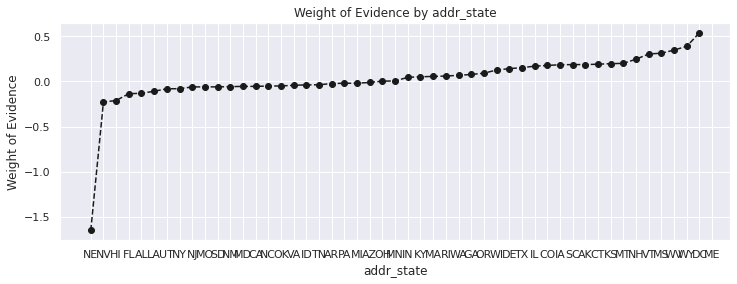

In [47]:
plot_by_woe(df_temp)

Very few observations for first two and last two states + North Dakato no data.

In [48]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
  pass
else:
  df_inputs_prepr['addr_state:ND'] = 0

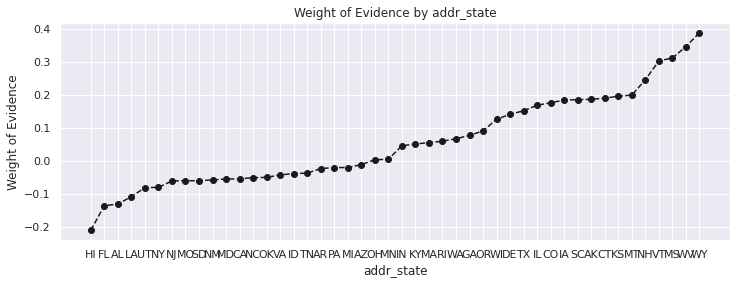

In [49]:
plot_by_woe(df_temp.iloc[2:-2,:])

Lets combine Nevada with Florida. NE, IA, NV => FL

If no data, go with the worst case scenario. 

Last 4 cols can be regrouped together. 

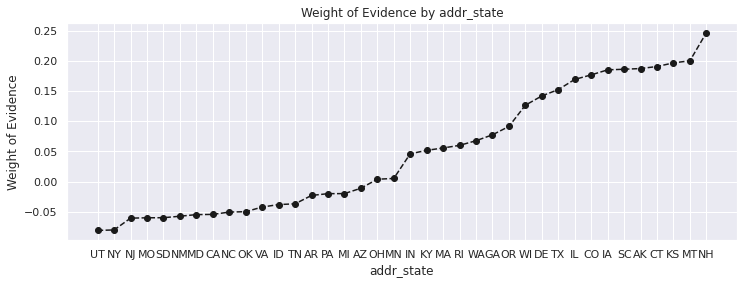

In [50]:
plot_by_woe(df_temp.iloc[6:-6,:])

rest of the states can be in the same group. We can seperate NY and CA.

check with the borrowers, try to regroup some states together. 

TX also has high number of borrowers.

In [51]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

## Part 2 Discrete Variables: Dummy Variables

**Let's repeat the same preprocessing on verification_status**

In [52]:
# 'verification_status'
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
# We calculate weight of evidence.
df_temp


,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,134645,0.873943,0.360951,117672.0,16973.0,0.353405,0.423668,-0.181335,NaN,NaN,0.023945
1,Source Verified,119854,0.896933,0.321300,107501.0,12353.0,0.322859,0.308347,0.045989,0.02299,0.227324,0.023945
2,Not Verified,118529,0.909423,0.317748,107793.0,10736.0,0.323736,0.267985,0.188998,0.01249,0.143009,0.023945


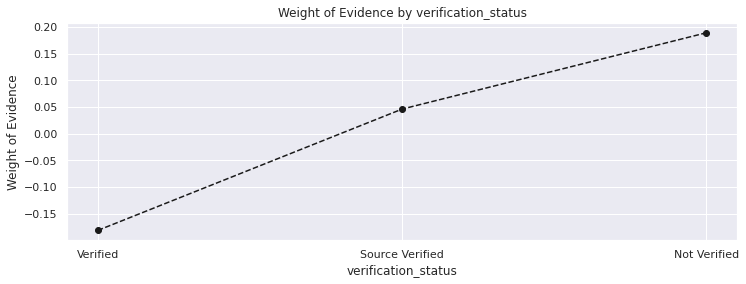

In [53]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

OK
**How about purpose row?

In [54]:
# 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,5632,0.795099,0.015098,4478.0,1154.0,0.013449,0.028805,-0.761670,NaN,NaN,0.032998
1,moving,2378,0.848612,0.006375,2018.0,360.0,0.006061,0.008986,-0.393854,0.053513,0.367816,0.032998
2,renewable_energy,287,0.850174,0.000769,244.0,43.0,0.000733,0.001073,-0.381644,0.001562,0.012210,0.032998
3,house,1802,0.865150,0.004831,1559.0,243.0,0.004682,0.006066,-0.258874,0.014976,0.122770,0.032998
4,other,19002,0.867698,0.050940,16488.0,2514.0,0.049519,0.062753,-0.236854,0.002548,0.022019,0.032998
5,medical,3664,0.871179,0.009822,3192.0,472.0,0.009587,0.011782,-0.206188,0.003481,0.030666,0.032998
6,educational,337,0.872404,0.000903,294.0,43.0,0.000883,0.001073,-0.195232,0.001225,0.010956,0.032998
7,debt_consolidation,219381,0.888135,0.588109,194840.0,24541.0,0.585165,0.612576,-0.045779,0.015732,0.149454,0.032998
8,vacation,1992,0.889056,0.005340,1771.0,221.0,0.005319,0.005516,-0.036475,0.000921,0.009303,0.032998
9,wedding,1880,0.890957,0.005040,1675.0,205.0,0.005031,0.005117,-0.017054,0.001901,0.019422,0.032998


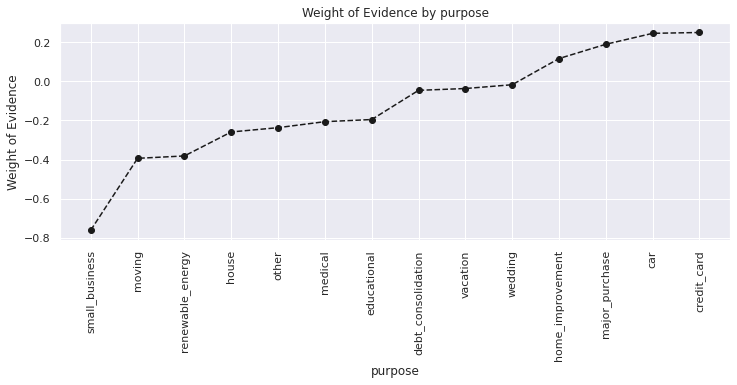

In [55]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [56]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

**initial list status***

In [57]:
# 'initial_list_status'
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,242477,0.882574,0.650024,214004.0,28473.0,0.64272,0.710723,-0.100574,NaN,NaN,0.021197
1,w,130551,0.911230,0.349976,118962.0,11589.0,0.35728,0.289277,0.211136,0.028656,0.311709,0.021197


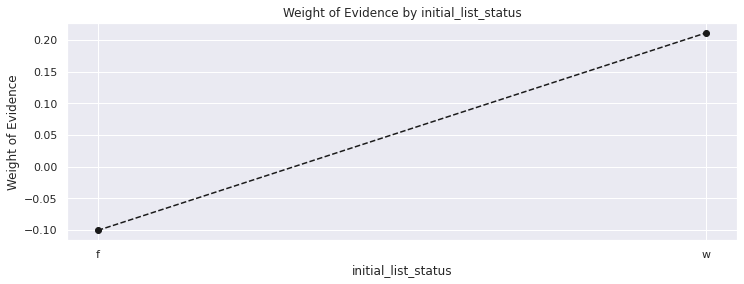

In [58]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

#5 Continous Data Preparation - WoE

In [59]:
df_inputs_prepr['term_int'].unique()

array([36, 60])

In [60]:
df_temp = woe_ordered_continuous ( df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,270458,0.905061,0.725034,244781.0,25677.0,0.735153,0.640932,0.137156,NaN,NaN,0.0416
1,60,102570,0.859754,0.274966,88185.0,14385.0,0.264847,0.359068,-0.304361,0.045307,0.441517,0.0416


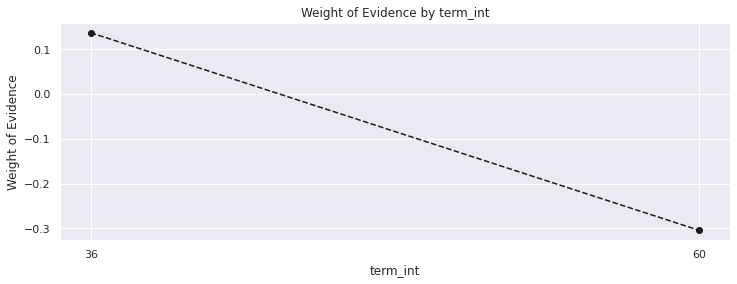

In [61]:
plot_by_woe(df_temp)

In [62]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int']==36),1,0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int']==60),1,0)

In [63]:
df_inputs_prepr['emp_length_int'].unique()

array([ 4., 10.,  3.,  0.,  8.,  1.,  5.,  2.,  7.,  6.,  9.])

In [64]:
df_temp = woe_ordered_continuous (df_inputs_prepr,'emp_length_int',df_targets_prepr)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,45847,0.879970,0.122905,40344.0,5503.0,0.121166,0.137362,-0.125463,NaN,NaN,0.005462
1,1.0,23806,0.890826,0.063818,21207.0,2599.0,0.063691,0.064874,-0.018408,0.010856,0.107055,0.005462
2,2.0,33003,0.892646,0.088473,29460.0,3543.0,0.088478,0.088438,0.000447,0.001820,0.018855,0.005462
3,3.0,29279,0.892858,0.078490,26142.0,3137.0,0.078513,0.078304,0.002664,0.000212,0.002217,0.005462
4,4.0,22503,0.893170,0.060325,20099.0,2404.0,0.060364,0.060007,0.005924,0.000311,0.003260,0.005462
5,5.0,24522,0.886265,0.065738,21733.0,2789.0,0.065271,0.069617,-0.064463,0.006904,0.070387,0.005462
6,6.0,20778,0.885552,0.055701,18400.0,2378.0,0.055261,0.059358,-0.071521,0.000713,0.007058,0.005462
7,7.0,20934,0.889558,0.056119,18622.0,2312.0,0.055928,0.057711,-0.031381,0.004006,0.040140,0.005462
8,8.0,17830,0.892092,0.047798,15906.0,1924.0,0.047771,0.048026,-0.005322,0.002534,0.026059,0.005462
9,9.0,14368,0.888363,0.038517,12764.0,1604.0,0.038334,0.040038,-0.043484,0.003729,0.038162,0.005462


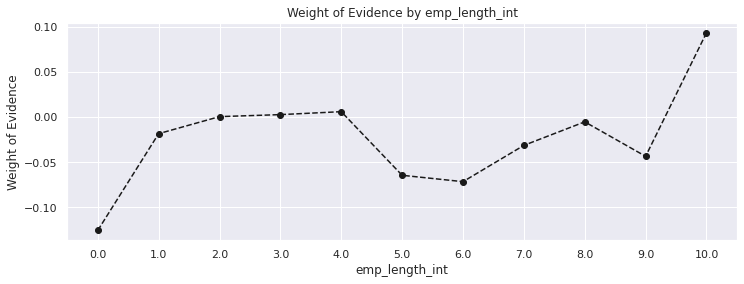

In [65]:
plot_by_woe(df_temp)

In [66]:
# We create the following categories: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'
# '0' will be the reference category
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

##Part 1 Continous Variables - Dummy Variables

In [67]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 68.,  42.,  53.,  41.,  37.,  63.,  61.,  56.,  84.,  57.,  64.,
        70.,  52.,  47.,  36.,  55.,  45.,  38.,  40.,  49.,  58.,  85.,
        54.,  71.,  44.,  43.,  62.,  46.,  48.,  50.,  59.,  51.,  65.,
        96.,  86.,  72.,  69.,  91.,  77.,  82.,  74., 110.,  66.,  80.,
       119.,  67.,  99.,  39., 116.,  60.,  73.,  75., 100.,  97.,  76.,
        78.,  94.,  88.,  81.,  89.,  79.,  87., 117., 113.,  93.,  98.,
       115., 122.,  83., 106., 109., 112.,  92.,  95., 101., 118.,  90.,
       102., 103., 107., 104., 114., 121., 120., 105., 123., 108., 124.,
       111., 126., 125.])

In [68]:
#let's do fine classing first: to roughly group the values into categories
#second, we need to do coarse classing: determining final categories, combining few of initial fine classing
# categories into bigger categories, if needed
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'],50)

In [69]:
df_inputs_prepr['mths_since_issue_d_factor'] 

221233     (66.6, 68.4]
378461     (41.4, 43.2]
117522     (52.2, 54.0]
352107     (39.6, 41.4]
253931    (35.91, 37.8]
              ...      
211080     (64.8, 66.6]
447953     (45.0, 46.8]
198675     (61.2, 63.0]
287088     (37.8, 39.6]
397560     (41.4, 43.2]
Name: mths_since_issue_d_factor, Length: 373028, dtype: category
Categories (50, interval[float64, right]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] <
                                            (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] <
                                            (122.4, 124.2] < (124.2, 126.0]]

In [70]:
df_temp = woe_ordered_continuous (df_inputs_prepr, 'mths_since_issue_d_factor',df_targets_prepr)
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(35.91, 37.8]",28321,0.943187,0.075922,26712.0,1609.0,0.080224,0.040163,0.691888,NaN,NaN,inf
1,"(37.8, 39.6]",39625,0.928555,0.106225,36794.0,2831.0,0.110504,0.070665,0.447093,0.014632,0.244795,inf
2,"(39.6, 41.4]",38418,0.916836,0.102990,35223.0,3195.0,0.105786,0.079751,0.282500,0.011719,0.164593,inf
3,"(41.4, 43.2]",28945,0.908896,0.077595,26308.0,2637.0,0.079011,0.065823,0.182619,0.007940,0.099881,inf
4,"(43.2, 45.0]",28278,0.902044,0.075807,25508.0,2770.0,0.076608,0.069143,0.102533,0.006852,0.080086,inf
5,"(45.0, 46.8]",12219,0.900074,0.032756,10998.0,1221.0,0.033030,0.030478,0.080431,0.001970,0.022102,inf
6,"(46.8, 48.6]",24532,0.898337,0.065765,22038.0,2494.0,0.066187,0.062254,0.061268,0.001737,0.019163,inf
7,"(48.6, 50.4]",23000,0.887957,0.061658,20423.0,2577.0,0.061337,0.064325,-0.047576,0.010380,0.108845,inf
8,"(50.4, 52.2]",20637,0.880554,0.055323,18172.0,2465.0,0.054576,0.061530,-0.119922,0.007402,0.072346,inf
9,"(52.2, 54.0]",18268,0.867528,0.048972,15848.0,2420.0,0.047596,0.060406,-0.238336,0.013026,0.118414,inf


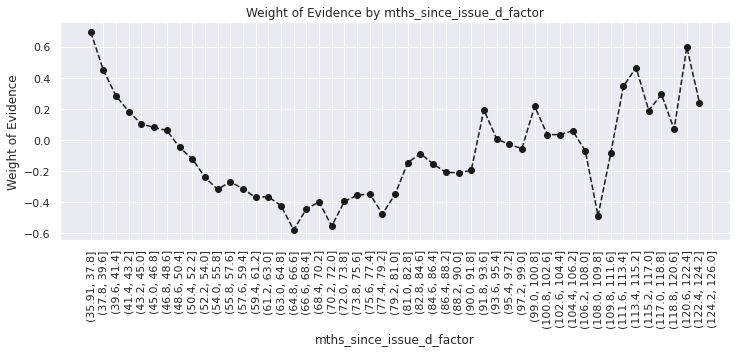

In [71]:
plot_by_woe(df_temp,90)

In [72]:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [73]:
# funded_amnt
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",1252,0.910543,0.003356,1140.0,112.0,0.003424,0.002796,0.202673,NaN,NaN,0.015716
1,"(1190.0, 1880.0]",3040,0.909211,0.008150,2764.0,276.0,0.008301,0.006889,0.186421,0.001333,0.016251,0.015716
2,"(1880.0, 2570.0]",6025,0.901245,0.016152,5430.0,595.0,0.016308,0.014852,0.093521,0.007966,0.092900,0.015716
3,"(2570.0, 3260.0]",7261,0.894780,0.019465,6497.0,764.0,0.019513,0.019070,0.022916,0.006464,0.070605,0.015716
4,"(3260.0, 3950.0]",4789,0.898726,0.012838,4304.0,485.0,0.012926,0.012106,0.065539,0.003946,0.042623,0.015716
5,"(3950.0, 4640.0]",9015,0.894620,0.024167,8065.0,950.0,0.024222,0.023713,0.021215,0.004106,0.044324,0.015716
6,"(4640.0, 5330.0]",15865,0.897195,0.042530,14234.0,1631.0,0.042749,0.040712,0.048828,0.002575,0.027613,0.015716
7,"(5330.0, 6020.0]",17138,0.908799,0.045943,15575.0,1563.0,0.046777,0.039015,0.181448,0.011604,0.132620,0.015716
8,"(6020.0, 6710.0]",6926,0.887237,0.018567,6145.0,781.0,0.018455,0.019495,-0.054793,0.021563,0.236241,0.015716
9,"(6710.0, 7400.0]",11726,0.900307,0.031435,10557.0,1169.0,0.031706,0.029180,0.083028,0.013071,0.137822,0.015716


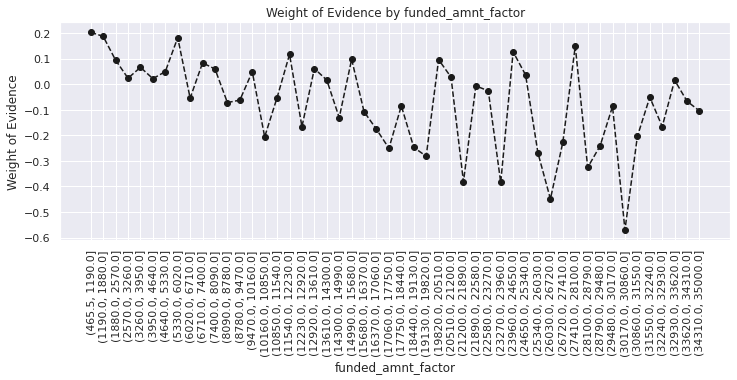

In [74]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [75]:
# mths_since_earliest_cr_line
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.587, 11.74]",26,1.000000,0.000070,26.0,0.0,0.000078,0.000000,inf,NaN,NaN,inf
1,"(11.74, 23.48]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(23.48, 35.22]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(35.22, 46.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
4,"(46.96, 58.7]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
5,"(58.7, 70.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(70.44, 82.18]",738,0.906504,0.001978,669.0,69.0,0.002009,0.001722,0.154065,NaN,NaN,inf
7,"(82.18, 93.92]",1931,0.890730,0.005177,1720.0,211.0,0.005166,0.005267,-0.019391,0.015774,0.173456,inf
8,"(93.92, 105.66]",2845,0.854482,0.007627,2431.0,414.0,0.007301,0.010334,-0.347420,0.036249,0.328029,inf
9,"(105.66, 117.4]",5097,0.871101,0.013664,4440.0,657.0,0.013335,0.016400,-0.206886,0.016619,0.140534,inf


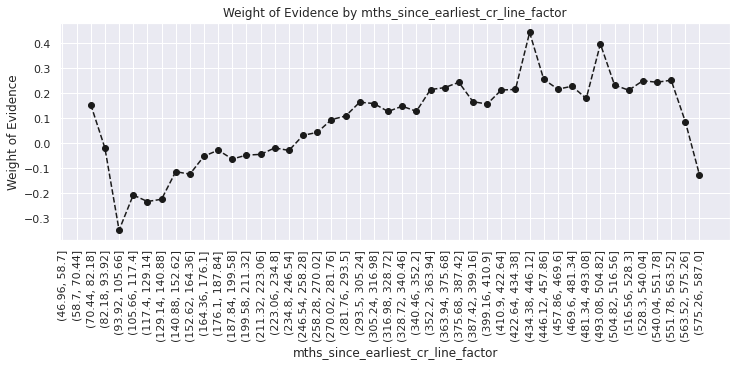

In [76]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [77]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [78]:
# delinq_2yrs
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,306341,0.892515,0.821228,273414.0,32927.0,0.821147,0.821901,-0.000918,NaN,NaN,inf
1,1.0,45019,0.894800,0.120685,40283.0,4736.0,0.120982,0.118217,0.023125,0.002285,2.404251e-02,inf
2,2.0,13061,0.888064,0.035013,11599.0,1462.0,0.034835,0.036493,-0.046499,0.006736,6.962312e-02,inf
3,3.0,4529,0.887613,0.012141,4020.0,509.0,0.012073,0.012705,-0.051023,0.000451,4.524361e-03,inf
4,4.0,1903,0.904887,0.005101,1722.0,181.0,0.005172,0.004518,0.135133,0.017274,1.861555e-01,inf
5,5.0,995,0.885427,0.002667,881.0,114.0,0.002646,0.002846,-0.072753,0.019460,2.078855e-01,inf
6,6.0,511,0.892368,0.001370,456.0,55.0,0.001370,0.001373,-0.002453,0.006941,7.030045e-02,inf
7,7.0,272,0.871324,0.000729,237.0,35.0,0.000712,0.000874,-0.204900,0.021044,2.024475e-01,inf
8,8.0,138,0.913043,0.000370,126.0,12.0,0.000378,0.000300,0.233763,0.041720,4.386632e-01,inf
9,9.0,92,0.913043,0.000247,84.0,8.0,0.000252,0.000200,0.233763,0.000000,1.665335e-16,inf


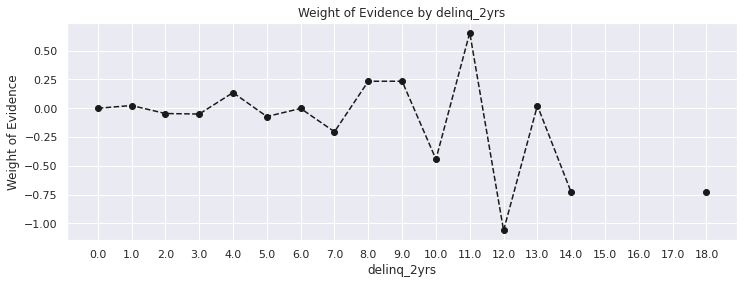

In [79]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [80]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [81]:
# inq_last_6mths
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,193317,0.909191,0.518237,175762.0,17555.0,0.527868,0.438196,0.186180,NaN,NaN,inf
1,1.0,103983,0.885058,0.278754,92031.0,11952.0,0.276398,0.298338,-0.076385,0.024132,0.262565,inf
2,2.0,46298,0.864595,0.124114,40029.0,6269.0,0.120219,0.156482,-0.263625,0.020464,0.187240,inf
3,3.0,20089,0.844492,0.053854,16965.0,3124.0,0.050951,0.077979,-0.425574,0.020103,0.161949,inf
4,4.0,5850,0.872308,0.015682,5103.0,747.0,0.015326,0.018646,-0.196093,0.027816,0.229481,inf
5,5.0,2176,0.877298,0.005833,1909.0,267.0,0.005733,0.006665,-0.150526,0.004990,0.045567,inf
6,6.0,948,0.857595,0.002541,813.0,135.0,0.002442,0.003370,-0.322156,0.019703,0.171630,inf
7,7.0,152,0.934211,0.000407,142.0,10.0,0.000426,0.000250,0.535630,0.076616,0.857786,inf
8,8.0,92,0.967391,0.000247,89.0,3.0,0.000267,0.000075,1.272412,0.033181,0.736782,inf
9,9.0,43,1.000000,0.000115,43.0,0.0,0.000129,0.000000,inf,0.032609,inf,inf


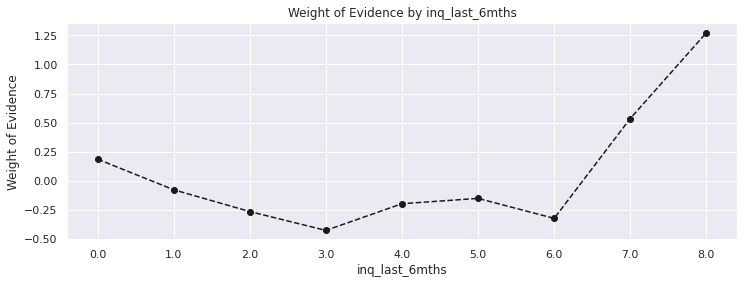

In [82]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [83]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [84]:
# open_acc
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,30,0.933333,0.000080,28.0,2.0,0.000084,0.000050,0.521445,NaN,NaN,inf
1,1.0,113,0.929204,0.000303,105.0,8.0,0.000315,0.000200,0.456907,0.004130,0.064539,inf
2,2.0,1441,0.859126,0.003863,1238.0,203.0,0.003718,0.005067,-0.309566,0.070078,0.766472,inf
3,3.0,4383,0.877253,0.011750,3845.0,538.0,0.011548,0.013429,-0.150942,0.018127,0.158624,inf
4,4.0,10103,0.895576,0.027084,9048.0,1055.0,0.027174,0.026334,0.031391,0.018323,0.182333,inf
5,5.0,17361,0.893036,0.046541,15504.0,1857.0,0.046563,0.046353,0.004524,0.002539,0.026867,inf
6,6.0,24592,0.896308,0.065925,22042.0,2550.0,0.066199,0.063651,0.039244,0.003272,0.034721,inf
7,7.0,30091,0.892526,0.080667,26857.0,3234.0,0.080660,0.080725,-0.000805,0.003782,0.040050,inf
8,8.0,33586,0.893348,0.090036,30004.0,3582.0,0.090111,0.089411,0.007797,0.000822,0.008603,inf
9,9.0,35156,0.889521,0.094245,31272.0,3884.0,0.093919,0.096950,-0.031755,0.003827,0.039552,inf


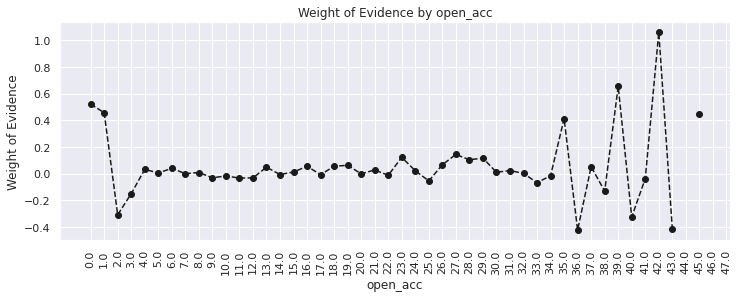

In [85]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

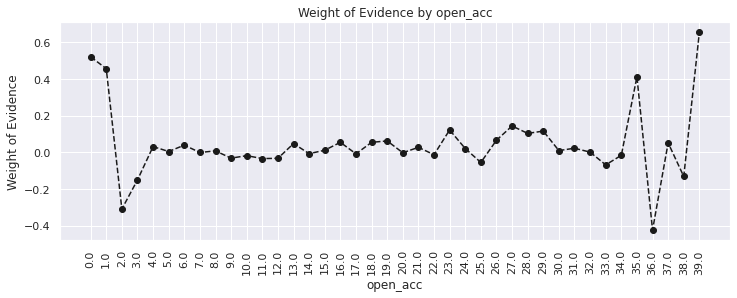

In [86]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)
# We plot the weight of evidence values.

In [87]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [88]:
# pub_rec
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,324000,0.891772,0.868568,288934.0,35066.0,0.867758,0.875293,-0.008646,NaN,NaN,inf
1,1.0,42411,0.896725,0.113694,38031.0,4380.0,0.114219,0.109331,0.043741,0.004953,0.052387,inf
2,2.0,4456,0.904623,0.011945,4031.0,425.0,0.012106,0.010609,0.132068,0.007898,0.088328,inf
3,3.0,1296,0.913580,0.003474,1184.0,112.0,0.003556,0.002796,0.240543,0.008957,0.108474,inf
4,4.0,416,0.903846,0.001115,376.0,40.0,0.001129,0.000998,0.123098,0.009734,0.117445,inf
5,5.0,216,0.898148,0.000579,194.0,22.0,0.000583,0.000549,0.059204,0.005698,0.063894,inf
6,6.0,117,0.923077,0.000314,108.0,9.0,0.000324,0.000225,0.367295,0.024929,0.308091,inf
7,7.0,46,0.913043,0.000123,42.0,4.0,0.000126,0.000100,0.233763,0.010033,0.133531,inf
8,8.0,24,0.958333,0.000064,23.0,1.0,0.000069,0.000025,1.017882,0.045290,0.784119,inf
9,9.0,16,0.812500,0.000043,13.0,3.0,0.000039,0.000075,-0.651275,0.145833,1.669157,inf


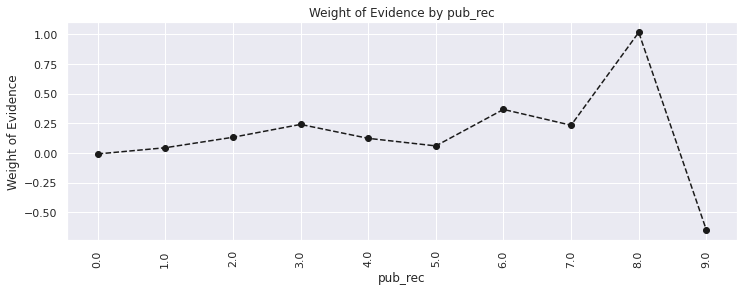

In [89]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [90]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [91]:
# total_acc
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.156, 3.12]",473,0.868922,0.001268,411.0,62.0,0.001234,0.001548,-0.226153,NaN,NaN,inf
1,"(3.12, 6.24]",6062,0.870175,0.016251,5275.0,787.0,0.015842,0.019645,-0.215106,0.001253,0.011047,inf
2,"(6.24, 9.36]",15056,0.876660,0.040362,13199.0,1857.0,0.039641,0.046353,-0.156433,0.006486,0.058673,inf
3,"(9.36, 12.48]",25232,0.882372,0.067641,22264.0,2968.0,0.066866,0.074085,-0.102529,0.005711,0.053904,inf
4,"(12.48, 15.6]",33508,0.884416,0.089827,29635.0,3873.0,0.089003,0.096675,-0.082685,0.002044,0.019844,inf
5,"(15.6, 18.72]",38844,0.889635,0.104132,34557.0,4287.0,0.103785,0.107009,-0.030589,0.005220,0.052096,inf
6,"(18.72, 21.84]",40667,0.890845,0.109019,36228.0,4439.0,0.108804,0.110803,-0.018209,0.001210,0.012380,inf
7,"(21.84, 24.96]",39995,0.893062,0.107217,35718.0,4277.0,0.107272,0.106760,0.004791,0.002216,0.023000,inf
8,"(24.96, 28.08]",47329,0.896385,0.126878,42425.0,4904.0,0.127415,0.122410,0.040074,0.003323,0.035284,inf
9,"(28.08, 31.2]",29747,0.898376,0.079745,26724.0,3023.0,0.080260,0.075458,0.061700,0.001991,0.021626,inf


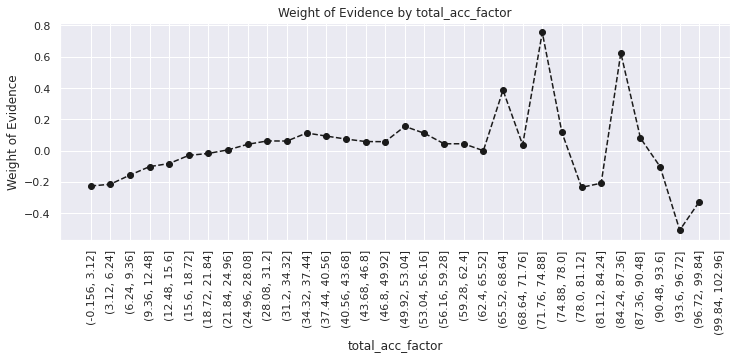

In [92]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [93]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [94]:
# acc_now_delinq
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,371623,0.892609,0.996234,331714.0,39909.0,0.996240,0.996181,0.000059,NaN,NaN,inf
1,1.0,1322,0.891831,0.003544,1179.0,143.0,0.003541,0.003569,-0.008035,0.000778,0.008094,inf
2,2.0,70,0.885714,0.000188,62.0,8.0,0.000186,0.000200,-0.069919,0.006116,0.061884,inf
3,3.0,9,0.777778,0.000024,7.0,2.0,0.000021,0.000050,-0.864849,0.107937,0.794930,inf
4,4.0,3,1.000000,0.000008,3.0,0.0,0.000009,0.000000,inf,0.222222,inf,inf
5,5.0,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf


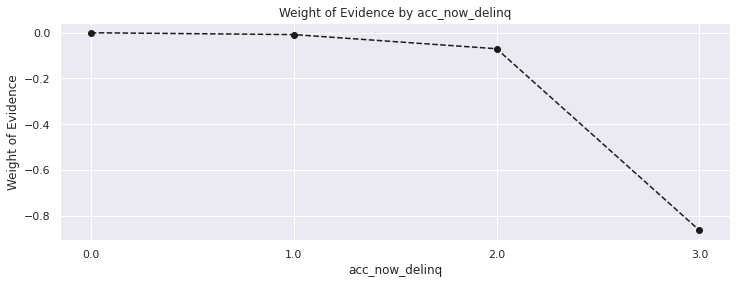

In [95]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [96]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [97]:
# total_rev_hi_lim
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 5000.0]",19480,0.874333,0.052221,17032.0,2448.0,0.051152,0.061105,-0.177790,NaN,NaN,inf
1,"(5000.0, 9999.999]",52754,0.880388,0.141421,46444.0,6310.0,0.139486,0.157506,-0.121501,0.006056,0.056289,inf
2,"(9999.999, 14999.998]",59565,0.883102,0.159680,52602.0,6963.0,0.157980,0.173806,-0.095468,0.002714,0.026032,inf
3,"(14999.998, 19999.998]",51403,0.879384,0.137799,45203.0,6200.0,0.135759,0.154760,-0.130998,0.003718,0.035530,inf
4,"(19999.998, 24999.997]",41522,0.889047,0.111311,36915.0,4607.0,0.110867,0.114997,-0.036571,0.009662,0.094427,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"(9974999.002, 9979999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1996,"(9979999.002, 9984999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(9984999.002, 9989999.001]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(9989999.001, 9994999.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


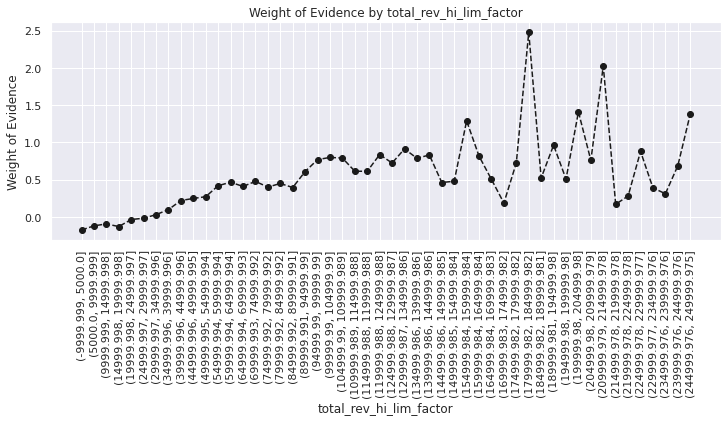

In [98]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)
# We plot the weight of evidence values.

In [99]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [100]:
# installment
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.276, 43.556]",1850,0.907568,0.004959,1679.0,171.0,0.005043,0.004268,0.166678,NaN,NaN,0.014838
1,"(43.556, 71.443]",4861,0.904958,0.013031,4399.0,462.0,0.013212,0.011532,0.135956,0.002610,0.030722,0.014838
2,"(71.443, 99.329]",6832,0.898419,0.018315,6138.0,694.0,0.018434,0.017323,0.062170,0.006539,0.073785,0.014838
3,"(99.329, 127.216]",9146,0.897660,0.024518,8210.0,936.0,0.024657,0.023364,0.053881,0.000759,0.008290,0.014838
4,"(127.216, 155.102]",10091,0.899713,0.027052,9079.0,1012.0,0.027267,0.025261,0.076423,0.002052,0.022543,0.014838
5,"(155.102, 182.988]",16742,0.899295,0.044881,15056.0,1686.0,0.045218,0.042085,0.071806,0.000417,0.004618,0.014838
6,"(182.988, 210.875]",17049,0.908206,0.045704,15484.0,1565.0,0.046503,0.039064,0.174309,0.008911,0.102504,0.014838
7,"(210.875, 238.761]",15058,0.902710,0.040367,13593.0,1465.0,0.040824,0.036568,0.110088,0.005496,0.064222,0.014838
8,"(238.761, 266.648]",18883,0.902452,0.050621,17041.0,1842.0,0.051179,0.045979,0.107158,0.000258,0.002929,0.014838
9,"(266.648, 294.534]",20059,0.893664,0.053773,17926.0,2133.0,0.053837,0.053242,0.011111,0.008788,0.096048,0.014838


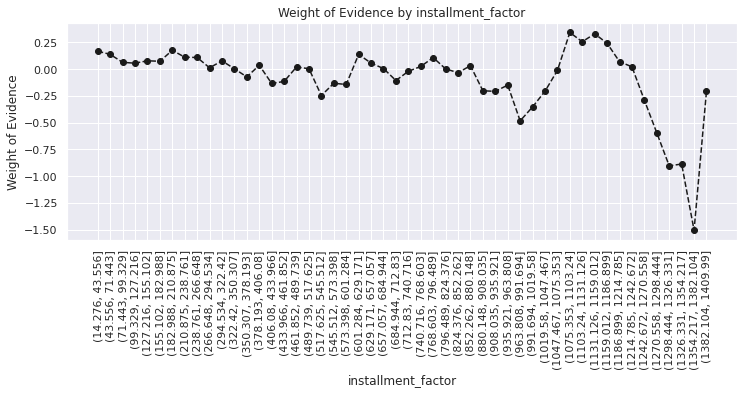

In [101]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

##Part 2 Continuous Variables - Dummy Variables

In [102]:
#after trial and error, we decideded to keep the income values equal and less than 140k. So we will apply 50 cuts.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000,:  ]
df_inputs_prepr_temp ['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'],50)
df_temp = woe_ordered_continuous (df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(1757.896, 4658.08]",11,0.909091,0.000031,10.0,1.0,0.000032,0.000026,0.208552,NaN,NaN,0.045529
1,"(4658.08, 7420.16]",43,0.883721,0.000123,38.0,5.0,0.000122,0.000130,-0.065885,0.025370,0.274437,0.045529
2,"(7420.16, 10182.24]",294,0.863946,0.000838,254.0,40.0,0.000813,0.001039,-0.245578,0.019775,0.179693,0.045529
3,"(10182.24, 12944.32]",523,0.820268,0.001490,429.0,94.0,0.001373,0.002442,-0.575871,0.043678,0.330293,0.045529
4,"(12944.32, 15706.4]",1217,0.840592,0.003467,1023.0,194.0,0.003273,0.005039,-0.431396,0.020324,0.144474,0.045529
5,"(15706.4, 18468.48]",1539,0.855101,0.004384,1316.0,223.0,0.004211,0.005792,-0.318853,0.014509,0.112544,0.045529
6,"(18468.48, 21230.56]",2942,0.859959,0.008381,2530.0,412.0,0.008096,0.010702,-0.279082,0.004858,0.039771,0.045529
7,"(21230.56, 23992.64]",2567,0.851578,0.007313,2186.0,381.0,0.006995,0.009896,-0.347004,0.008381,0.067922,0.045529
8,"(23992.64, 26754.72]",7008,0.854167,0.019965,5986.0,1022.0,0.019154,0.026546,-0.326371,0.002589,0.020633,0.045529
9,"(26754.72, 29516.8]",5607,0.856251,0.015974,4801.0,806.0,0.015362,0.020936,-0.309537,0.002084,0.016834,0.045529


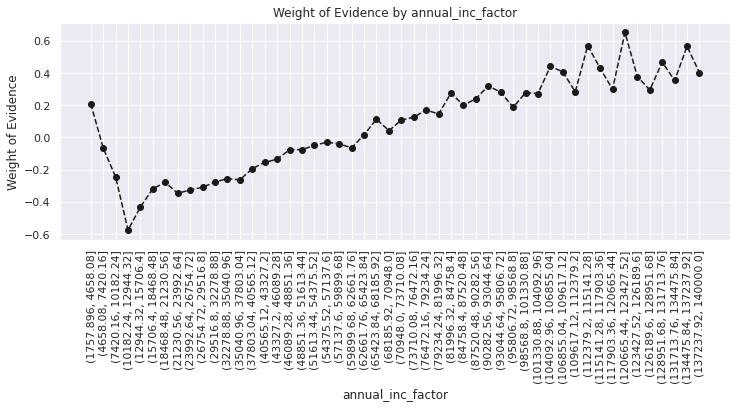

In [103]:
plot_by_woe(df_temp,90)

In [104]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)


In [105]:
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.188, 3.76]",5377,0.895667,0.031083,4816.0,561.0,0.031116,0.030807,0.009964,NaN,NaN,inf
1,"(3.76, 7.52]",11106,0.885827,0.064201,9838.0,1268.0,0.063562,0.069632,-0.091203,0.009839,0.101166,inf
2,"(7.52, 11.28]",13355,0.893972,0.077202,11939.0,1416.0,0.077137,0.077759,-0.008040,0.008145,0.083163,inf
3,"(11.28, 15.04]",13223,0.890645,0.076439,11777.0,1446.0,0.076090,0.079407,-0.042667,0.003327,0.034627,inf
4,"(15.04, 18.8]",9293,0.895728,0.053721,8324.0,969.0,0.053781,0.053213,0.010619,0.005083,0.053286,inf
5,"(18.8, 22.56]",11678,0.896900,0.067508,10474.0,1204.0,0.067672,0.066118,0.023232,0.001172,0.012613,inf
6,"(22.56, 26.32]",10864,0.895158,0.062802,9725.0,1139.0,0.062832,0.062548,0.004535,0.001742,0.018697,inf
7,"(26.32, 30.08]",10591,0.896988,0.061224,9500.0,1091.0,0.061379,0.059912,0.024183,0.001830,0.019648,inf
8,"(30.08, 33.84]",7531,0.901341,0.043535,6788.0,743.0,0.043857,0.040802,0.072201,0.004353,0.048018,inf
9,"(33.84, 37.6]",9827,0.899664,0.056808,8841.0,986.0,0.057121,0.054146,0.053484,0.001677,0.018717,inf


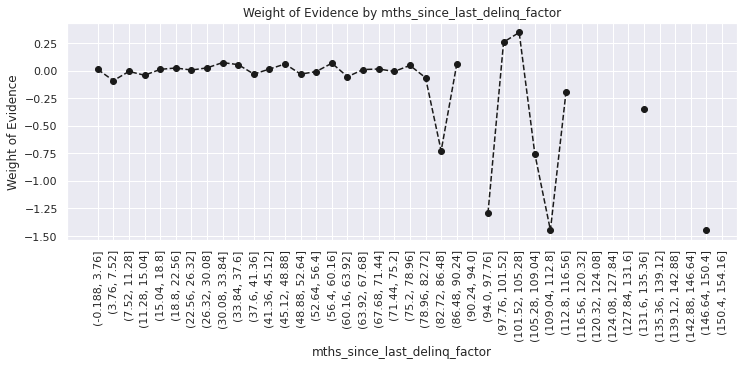

In [106]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [107]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

In [108]:
# Similarly to income, initial examination shows that most values are lower than 35.
# Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine
# the categories of everyone with 35 or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
# We calculate weight of evidence.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])

df_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.035, 0.7]",1338,0.904335,0.003615,1210.0,128.0,0.003662,0.003222,0.128263,NaN,NaN,0.030313
1,"(0.7, 1.4]",1648,0.898058,0.004453,1480.0,168.0,0.004480,0.004228,0.057751,0.006277,0.070512,0.030313
2,"(1.4, 2.1]",2028,0.915680,0.005479,1857.0,171.0,0.005621,0.004304,0.266971,0.017622,0.209221,0.030313
3,"(2.1, 2.8]",2547,0.916372,0.006882,2334.0,213.0,0.007064,0.005361,0.275964,0.000692,0.008993,0.030313
4,"(2.8, 3.5]",3114,0.910405,0.008413,2835.0,279.0,0.008581,0.007022,0.200503,0.005968,0.075461,0.030313
5,"(3.5, 4.2]",3859,0.919927,0.010426,3550.0,309.0,0.010745,0.007777,0.323279,0.009523,0.122776,0.030313
6,"(4.2, 4.9]",4567,0.914386,0.012339,4176.0,391.0,0.012640,0.009841,0.250319,0.005542,0.072960,0.030313
7,"(4.9, 5.6]",5368,0.916356,0.014503,4919.0,449.0,0.014889,0.011300,0.275755,0.001970,0.025436,0.030313
8,"(5.6, 6.3]",5949,0.916120,0.016073,5450.0,499.0,0.016496,0.012559,0.272682,0.000236,0.003073,0.030313
9,"(6.3, 7.0]",6597,0.917084,0.017824,6050.0,547.0,0.018312,0.013767,0.285282,0.000963,0.012600,0.030313


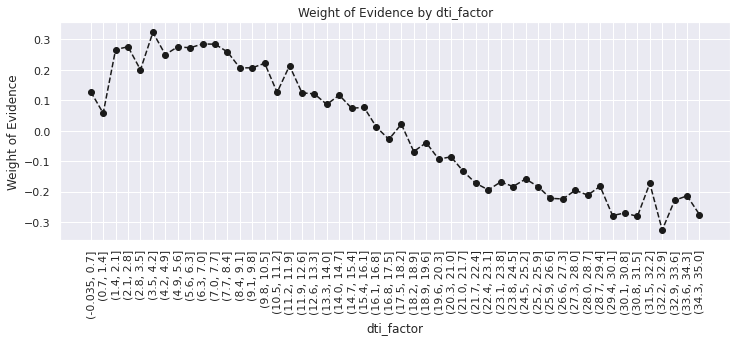

In [109]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [110]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [111]:
# mths_since_last_record
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
#sum(loan_data_temp['mths_since_last_record'].isnull())
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.129, 2.58]",1095,0.919635,0.021865,1007.0,88.0,0.022379,0.017319,0.256284,NaN,NaN,inf
1,"(2.58, 5.16]",128,0.898438,0.002556,115.0,13.0,0.002556,0.002559,-0.001127,0.021197,0.257411,inf
2,"(5.16, 7.74]",122,0.909836,0.002436,111.0,11.0,0.002467,0.002165,0.130525,0.011399,0.131652,inf
3,"(7.74, 10.32]",250,0.900000,0.004992,225.0,25.0,0.005000,0.004920,0.016115,0.009836,0.114410,inf
4,"(10.32, 12.9]",197,0.908629,0.003934,179.0,18.0,0.003978,0.003543,0.115904,0.008629,0.099789,inf
5,"(12.9, 15.48]",299,0.913043,0.005971,273.0,26.0,0.006067,0.005117,0.170265,0.004414,0.054361,inf
6,"(15.48, 18.06]",331,0.903323,0.006610,299.0,32.0,0.006645,0.006298,0.053598,0.009720,0.116668,inf
7,"(18.06, 20.64]",254,0.925197,0.005072,235.0,19.0,0.005222,0.003739,0.334037,0.021874,0.280439,inf
8,"(20.64, 23.22]",438,0.901826,0.008746,395.0,43.0,0.008778,0.008463,0.036576,0.023370,0.297461,inf
9,"(23.22, 25.8]",319,0.905956,0.006370,289.0,30.0,0.006423,0.005904,0.084119,0.004130,0.047544,inf


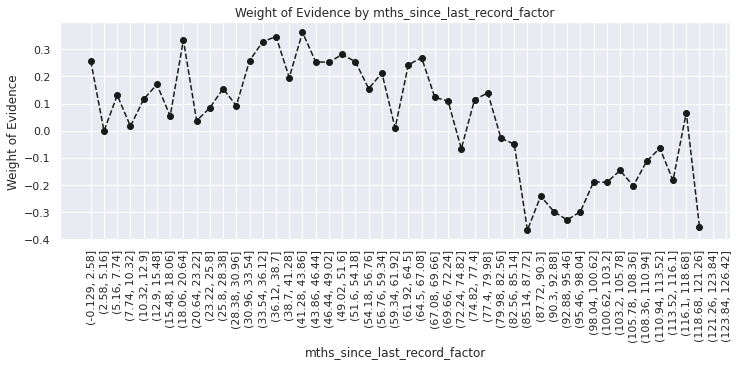

In [112]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [113]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>=86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

#6 Exporting CSV files - Preprocessed data

##a Exporting train dataset

In [114]:
#first run the code for the train and then test
inputs_train = df_inputs_prepr
inputs_train.to_csv('loan_data_inputs_train.csv')
targets_train.to_csv('loan_data_targets_train.csv')
#inputs_test = df_inputs_prepr
#inputs_test.to_csv('loan_data_inputs_test.csv')
#targets_test.to_csv('loan_data_targets_test.csv')

##b Exporting test dataset

Here we have two options to run preprocessing.

Option 1:

 Either go to the code in '3c' and change df_inputs_prepr to inputs_test. Run all the codes above till down here.

Option 2: 

  Use the python code on the src folder. Run the results with that.import sys #importing local functions in src folder
sys.path.append('../src/')
from functions import cross_validate_score, score_ML_log


In [115]:
#running preproc on test dataset
inputs_test= preproc_input (inputs_test)
inputs_test.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [116]:
inputs_test.to_csv('loan_data_inputs_test.csv')
targets_train.to_csv('loan_data_targets_test.csv')

--- End of Notebook ---
#END